In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=pd.read_csv('winequality-red.csv')

In [92]:
x=df.iloc[:,:11]
y=df.iloc[:,11].values

In [93]:
x_norm=(x-x.mean())/x.std()
ones=np.ones([x_norm.shape[0],1])
x_norm=np.concatenate((ones,x_norm),axis=1)

In [94]:
y_ohe=[]
for i in y:
    if i==3:
        e=[1,0,0,0,0,0]
    elif i==4:
        e=[0,1,0,0,0,0]
    elif i==5:
        e=[0,0,1,0,0,0]
    elif i==6:
        e=[0,0,0,1,0,0]
    elif i==7:
        e=[0,0,0,0,1,0]
    elif i==8:
        e=[0,0,0,0,0,1]
    y_ohe.append(e)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, np.array(y_ohe), test_size = 0.25, random_state = 605)
w=np.zeros((6,12))
a=np.zeros((len(x_train),6))
a_test=np.zeros((len(x_test),6))

In [96]:
def softmax(x_train,w,a):
    z=np.dot(x_train,w.T)
    for i in range(len(z)):
        for j in range(len(z[i])):
            a[i][j]=np.exp(z[i][j])/np.sum(np.exp(z[i]))
    return a
softmax(x_train,w,a)

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       ...,
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]])

In [97]:
def lossfn(a,y_train):
    loss=0
    for i in range(len(a)):
        for k in range(len(a[i])):
            loss+=y_train[i][k]*np.log(a[i][k])
    return ((-1)/len(a))*(loss)
lossfn(a,y_train)

1.7917594692280547

In [98]:
def gradient_descent(x_train,y_train,w,alpha,epoch,a):
    cost=[]
    for iter in range(epoch):        
        total=alpha*np.dot(x_train.T,(y_train-a))/len(a)
        w=w+total.T
        a=softmax(x_train,w,a)
        cost.append(lossfn(a,y_train))
    return w,cost


In [99]:
alpha=0.2
epoch=1000
g,cost_list=gradient_descent(x_train,y_train,w,alpha,epoch,a)

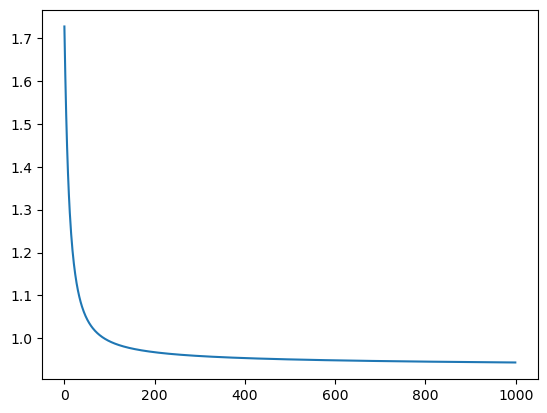

In [100]:
plt.plot(cost_list)

In [101]:
y_pred_prob = softmax(x_test, g,a_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1)) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 66.0 %
